In [1]:
import numpy as np, os
import math
from ezc3d import c3d
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data_path = '/home/katerina/catkin_ws/src/vision_based_fall_detection/'
subjects = os.listdir(data_path)
print(subjects)

['CMakeLists.txt', 'SOTIRIOU_C3D', 'develop.ipynb', 'package.xml', 'develop_v2.ipynb', 'cnn.ipynb', '.git', 'Untitled.ipynb', 'README.md', 'data.zip', '.ipynb_checkpoints', 'heatmaps', 'MAUROPOULOU_C3D']


In [3]:
def choose_subject(sid):
    subject_path = data_path + subjects[sid] + '/'
    filenames = sorted(os.listdir(subject_path))
    return [subject_path,filenames]
# Print all the files with different actions
# print(filenames)

In [4]:
subject_id = 1
f = choose_subject(subject_id)
path = f[0]
filenames = f[1]
print(filenames)


['cutting_10.c3d', 'cutting_11.c3d', 'cutting_12.c3d', 'cutting_13.c3d', 'cutting_14.c3d', 'cutting_15.c3d', 'cutting_17.c3d', 'cutting_18.c3d', 'cutting_19.c3d', 'cutting_2.c3d', 'cutting_20.c3d', 'cutting_4.c3d', 'cutting_5.c3d', 'cutting_6.c3d', 'cutting_8.c3d', 'cutting_9.c3d', 'gait trial_10.c3d', 'gait trial_11.c3d', 'gait trial_13.c3d', 'gait trial_16.c3d', 'gait trial_17.c3d', 'gait trial_18.c3d', 'gait trial_19.c3d', 'gait trial_20.c3d', 'gait trial_22.c3d', 'gait trial_23.c3d', 'gait trial_24.c3d', 'gait trial_25.c3d', 'gait trial_26.c3d', 'gait trial_27.c3d', 'gait trial_28.c3d', 'gait trial_3.c3d', 'gait trial_30.c3d', 'gait trial_31.c3d', 'gait trial_32.c3d', 'gait trial_33.c3d', 'gait trial_34.c3d', 'gait trial_35.c3d', 'gait trial_4.c3d', 'gait trial_6.c3d', 'gait trial_7.c3d', 'gait trial_9.c3d', 'sit to stand.c3d', 'sit to stand02.c3d', 'sit to stand03.c3d', 'sit to stand06.c3d', 'sit to stand07.c3d', 'sit to stand08.c3d', 'sit to stand09.c3d', 'sit to stand10.c3d', 's

In [5]:
# Select a certain action from the givens
def _selected_action_(act):
    ij = act
    data = c3d(path + filenames[ij])
    print("The selected action file is:",filenames[ij])
    return data

In [6]:
data = _selected_action_(-10)
joints_num = data['parameters']['POINT']['USED']['value'][0]
desired_joints = [
    'C7', 'CLAV', 'LANK', 'LASI', 'LBHD', 'LELB', 'LFHD', 'LFIN',
    'LFRM', 'LHEE', 'LKNE', 'LPSI', 'LSHO', 'LTHI', 'LTIB', 'LTOE',
    'LUPA', 'LWRA', 'LWRB', 'RANK', 'RASI', 'RBAK', 'RBHD', 'RELB',
    'RFHD', 'RFIN', 'RFRM', 'RHEE', 'RKNE', 'RPSI', 'RSHO', 'RTHI',
    'RTIB', 'RTOE', 'RUPA', 'RWRA', 'RWRB', 'T10'
]

The selected action file is: stand to sit_2.c3d


In [7]:
print("# ---- HEADER ---- #")
print(f"Number of points = {data['header']['points']['size']}")
print(f"Point frame rate = {data['header']['points']['frame_rate']}")
print(f"Index of the first point frame = {data['header']['points']['first_frame']}")
print(f"Index of the last point frame = {data['header']['points']['last_frame']}")
print("")
print(f"Number of analogs = {data['header']['analogs']['size']}")
print(f"Analog frame rate = {data['header']['analogs']['frame_rate']}")
print(f"Index of the first analog frame = {data['header']['analogs']['first_frame']}")
print(f"Index of the last analog frame = {data['header']['analogs']['last_frame']}")
print("")

# ---- HEADER ---- #
Number of points = 41
Point frame rate = 100.0
Index of the first point frame = 347
Index of the last point frame = 976

Number of analogs = 36
Analog frame rate = 1000.0
Index of the first analog frame = 3470
Index of the last analog frame = 9769



In [8]:
# Print the parameters
print("# ---- PARAMETERS ---- #")
# the number of points/joints that contains x,y,z coordinates
print(f"Number of points = {data['parameters']['POINT']['USED']['value'][0]}")
# the name of these joints
print(f"Name of the points = {data['parameters']['POINT']['LABELS']['value']}")
print(f"Point frame rate = {data['parameters']['POINT']['RATE']['value'][0]}")
print(f"Number of frames = {data['parameters']['POINT']['FRAMES']['value'][0]}")
print("")
print(f"Number of analogs = {data['parameters']['ANALOG']['USED']['value'][0]}")
print(f"Name of the analogs = {data['parameters']['ANALOG']['LABELS']['value']}")
print(f"Analog frame rate = {data['parameters']['ANALOG']['RATE']['value'][0]}")
print("")


# ---- PARAMETERS ---- #
Number of points = 41
Name of the points = ['RFHD', 'RBHD', 'STRN', 'LELB', 'LFRM', 'LWRA', 'LFIN', 'RSHO', 'RUPA', 'RELB', 'RFRM', 'RWRA', 'RWRB', 'RFIN', 'RASI', 'LTHI', 'LKNE', 'LANK', 'LHEE', 'LTOE', 'RKNE', 'RANK', 'RHEE', 'RTOE', 'ICL', 'ICR', 'LUPA', 'LTIB', 'LWRB', 'CLAV', 'RTHI', 'RTIB', 'LFHD', 'LBHD', 'LSHO', 'LPSI', 'C7', 'RBAK', 'T10', 'RPSI', 'LASI']
Point frame rate = 100.0
Number of frames = 630

Number of analogs = 36
Name of the analogs = ['Force.Fx1', 'Force.Fy1', 'Force.Fz1', 'Moment.Mx1', 'Moment.My1', 'Moment.Mz1', 'Force.Fx2', 'Force.Fy2', 'Force.Fz2', 'Moment.Mx2', 'Moment.My2', 'Moment.Mz2', 'Raw.Pin 1', 'Raw.Pin 2', 'Raw.Pin 3', 'Raw.Pin 4', 'Raw.Pin 5', 'Raw.Pin 6', 'Raw.Pin 7', 'Raw.Pin 8', 'Raw.Pin 9', 'Raw.Pin 10', 'Raw.Pin 11', 'Raw.Pin 12', 'Raw.Pin 13', 'Raw.Pin 14', 'Raw.Pin 15', 'Raw.Pin 16', 'Voltage.RF Right', 'Voltage.VL Right', 'Voltage.VM Right', 'Voltage.GM Right', 'Voltage.RF Left', 'Voltage.VL Left', 'Voltage.VM Left',

In [9]:
frame = -50
points_residuals = data['data']['meta_points']['residuals']
# print(points_residuals.shape)
point_data = data['data']['points']
# print(point_data.shape)
# Points 0:3 contains x,y,z positions, 4 doen't contain useful info for now
pose = point_data[0:3,:,frame]
# print(pose.shape)
print("The number of different actions is:", len(filenames))
print("The number of tracked joints is for each action is:", point_data.shape[1])

The number of different actions is: 64
The number of tracked joints is for each action is: 41


In [10]:
# mark a certain joint for optical purpose
def plot_3dview(marked_joint):
    ii = marked_joint
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim3d(-600, 1200)
    ax.set_ylim3d(-600, 1200)
    ax.set_zlim3d(0, 1600)
    for i in range(len(pose[0])):
        if i == ii:
            x = pose[0,i]
            y = pose[1,i]
            z = pose[2,i]
            ax.scatter(x, y, z, color='red')
        else:
            x = pose[0,i]
            y = pose[1,i]
            z = pose[2,i]
            ax.scatter(x, y, z, color='blue')
    plt.show()

<IPython.core.display.Javascript object>


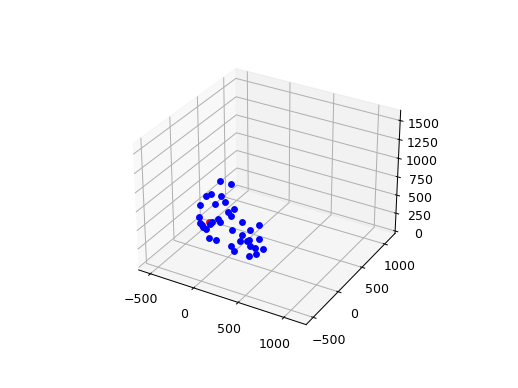

In [11]:
plot_3dview(5)

In [12]:
# Marker id refair to a certain joint 
# Here we take marker_id:0 == name of the joint:RFHD and plot x,y,z for all the frames
def plot_joint(jid):
    marker_id = jid
    plt.figure()
    plt.title(f"This time series shows x dim of joint {jid}")
    plt.plot(np.arange(len(point_data[0,marker_id,:])),point_data[0,marker_id,:])
    plt.grid('on')
    plt.show()
    plt.figure()
    plt.title(f"This time series shows y dim of joint {jid}")
    plt.plot(np.arange(len(point_data[1,marker_id,:])),point_data[1,marker_id,:])
    plt.grid('on')
    plt.show()
    plt.figure()
    plt.title(f"This time series shows z dim of joint {jid}")
    plt.plot(np.arange(len(point_data[2,marker_id,:])),point_data[2,marker_id,:])
    plt.grid('on')
    plt.show()

<IPython.core.display.Javascript object>


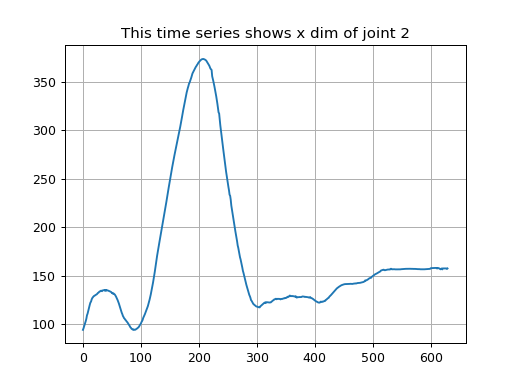

<IPython.core.display.Javascript object>


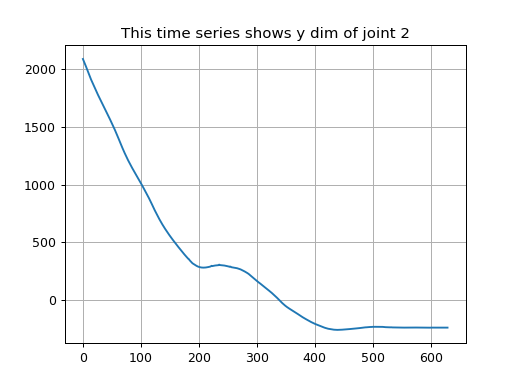

<IPython.core.display.Javascript object>


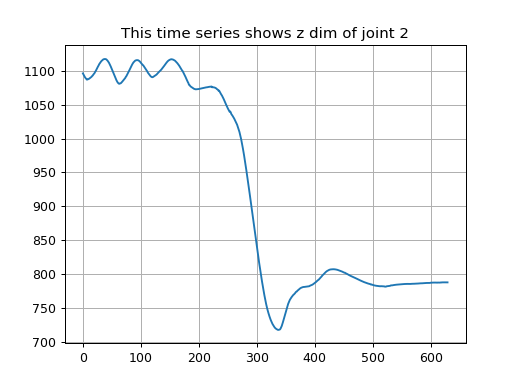

In [13]:
plot_joint(2)

In [14]:
def _scatter_xy_(jid):
    marker_id = jid
    plt.figure()
    plt.xlim(-600,1000)
    plt.ylim(-600,1700)
    plt.scatter(point_data[0,marker_id,:],point_data[1,marker_id,:])
    plt.grid('on')
    plt.show()

<IPython.core.display.Javascript object>


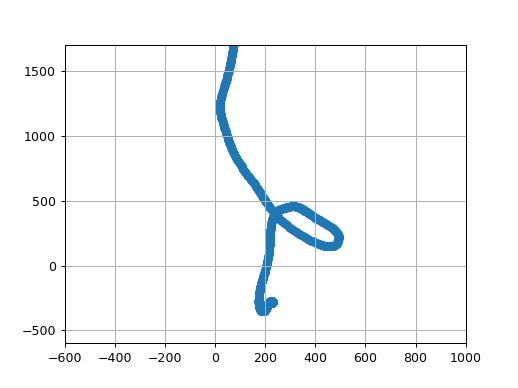

In [15]:
_scatter_xy_(0)

In [16]:
# Categorize actions : cutting, gait trial, sit to stand, stand to sit, turning, static
def choose_action(files):
    cutting_data = []
    turn_data = []
    gait_data = []
    sit2std_data = []
    std2sit_data = []
    stat_data = []
    
    for file in files:
            if file.lower().startswith("cutting"):
                cutting_data.append(file)
#                 print("cutting data:",cutting_data)
    #             print("")
            elif file.lower().startswith("gait trial"):
                gait_data.append(file)
#                 print("Gait trials:", gait_data)
    #             print("")
            elif file.lower().startswith("stand to sit:"):
                std2sit_data.append(file)
#                 print("Stand to sit",std2sit_data)
    #             print("")
            elif file.lower().startswith("sit to stand"):
                sit2std_data.append(file)
#                 print("Sit to stand:", sit2std_data)
    #             print("")
            elif file.lower().startswith("turning"):
                turn_data.append(file) 
#                 print("Turning:",turn_data)
    #             print("")
            elif file.lower().startswith("static"):
                stat_data.append(file)
#                 print("Static:",stat_data)
    #             print("")
    return[cutting_data, gait_data, std2sit_data, sit2std_data, turn_data, stat_data]


In [17]:
action = choose_action(filenames)

filelist = {
    "cutting_data": action[0],
    "gait_data": action[1],
    "std2sit_data": action[2],
    "sit2std_data": action[3],
    "turn_data": action[4],
    "stat_data": action[5]
        }

In [18]:
for ff in filelist:
    print(len(filelist[ff]))

16
26
0
11
5
1


In [19]:
# print (turn_data)

In [20]:
def calculateJointMap(joints, desired_joints):
    # Calculate the subject-specific indexes of the desired joints
    return [joints.index(j) for j in desired_joints]

In [21]:
def _standardization_vec_(pos):
#     Remove nan from array
    pos = pos[np.logical_not(np.isnan(pos))]
    stds = np.std(pos, keepdims=True)
    means = np.mean(pos, keepdims=True)
    stand_pose = (pos-means)/stds
    return stand_pose        

In [22]:
# Choose between actions: cutting_data, gait_data, std2sit_data, sit2std_data,
# turn_data, stat_data 
# This function categorize all x,y,z values from all joints in pose_x , pose_y, pose_z arrays
def action_xyz_categorization(action):
    pose = []
    pose_x = []
    pose_y = []
    pose_z = []
    # Select each action from the chosen category
    row = 0
    for i in range(5):
        data = c3d(path + action[i])
        point_data = data['data']['points']
        joint_map = calculateJointMap(data['parameters']['POINT']['LABELS']['value'], desired_joints)
        
        pose_x.append([])
        pose_y.append([])
        pose_z.append([])
        
        # Take each joint
        for j in joint_map:#range(point_data.shape[1]):
            pose_x[row].append(_standardization_vec_(point_data[0,j,:]))
            pose_y[row].append(_standardization_vec_(point_data[1,j,:]))
            pose_z[row].append(_standardization_vec_(point_data[2,j,:]))
        row+=1

    pose.append(pose_x)
    pose.append(pose_y)
    pose.append(pose_z)
    return pose


In [23]:
reference_action = "turn_data"
pose  = action_xyz_categorization(filelist[reference_action])
# standardization(pose_x)
print(np.shape(pose))
print("Length of array(x,y,z):", len(pose))
print("Number of action are :", len(pose[0]))
print("Number of joints are:", len(pose[0][0]))

(3, 5, 38)
Length of array(x,y,z): 3
Number of action are : 5
Number of joints are: 38


/home/katerina/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [24]:
# Pearson's r
# cross-correlation
def cross_correlation(pose1, pose2):
    cross_matrix = np.zeros((len(pose1[0])*len(pose2[0]),len(pose1)*len(pose1[0][0])))
    print(cross_matrix.shape)
    coordinate_num = 3
    action_num1 = len(pose1[0])
    action_num2 = len(pose2[0])
    joints_num = len(pose1[0][0])
    col = 0
#     rho = 0
    for i in range(coordinate_num):
        for j in range(joints_num):
            row = 0
            for a in range(action_num1):
                for k in range(action_num2):
                    first_p = pose1[i][a][j]
                    second_p = pose2[i][k][j]
                    if (len(first_p) == len(second_p)):
                        rho = scipy.stats.pearsonr(first_p, second_p)
                    elif (len(first_p)<len(second_p)):
                        second_p = scipy.signal.resample(second_p, len(first_p))
                        rho = scipy.stats.pearsonr(first_p, second_p)
                    elif (len(first_p)>len(second_p)):
                        first_p = scipy.signal.resample(first_p, len(second_p))
                        rho = scipy.stats.pearsonr(first_p, second_p)
                    cross_matrix[row,col] = rho[0]
                    row += 1
            col += 1
    return cross_matrix

In [25]:
# self-correlation
import scipy.stats
import scipy.signal
tot_matrix = np.zeros((np.sum(np.arange(len(pose[0]))),len(pose)*len(pose[0][0])))
print(tot_matrix.shape)
coordinate_num = 3
action_num = len(pose[0])
joints_num = len(pose[0][0])
col = 0
for i in range(coordinate_num):
    for j in range(joints_num):
        row = 0
        for a in range(action_num):
            for k in range(a+1,action_num):
                first_p = pose[i][a][j]
                second_p = pose[i][k][j]
                if (len(first_p) == len(second_p)):
                    scipy.stats.pearsonr(first_p, second_p)
                elif (len(first_p)<len(second_p)):
                    second_p = scipy.signal.resample(second_p, len(first_p))
                    rho = scipy.stats.pearsonr(first_p, second_p)
                elif (len(first_p)>len(second_p)):
                    first_p = scipy.signal.resample(first_p, len(second_p))
                    rho = scipy.stats.pearsonr(first_p, second_p)
                tot_matrix[row,col] = rho[0]
                row += 1
        col += 1

(10, 114)


In [26]:
for key, _ in filelist.items():
    if key != reference_action and key != "stat_data" and key !="std2sit_data":
        print(key)
        action_data = filelist[key]
        pose2 = action_xyz_categorization(action_data)
        print(np.shape(pose2))
        # standardization(pose_x)
        print("Length of array(x,y,z):", len(pose2))
        print("Number of action are :", len(pose2[0]))
        print("Number of joints are:", len(pose2[0][0]))

        cross_matrix = cross_correlation(pose,pose2)
        tot_matrix = np.concatenate((tot_matrix,cross_matrix), axis=0)

cutting_data
(3, 5, 38)
Length of array(x,y,z): 3
Number of action are : 5
Number of joints are: 38
(25, 114)


/home/katerina/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


gait_data
(3, 5, 38)
Length of array(x,y,z): 3
Number of action are : 5
Number of joints are: 38
(25, 114)
sit2std_data
(3, 5, 38)
Length of array(x,y,z): 3
Number of action are : 5
Number of joints are: 38
(25, 114)


<IPython.core.display.Javascript object>


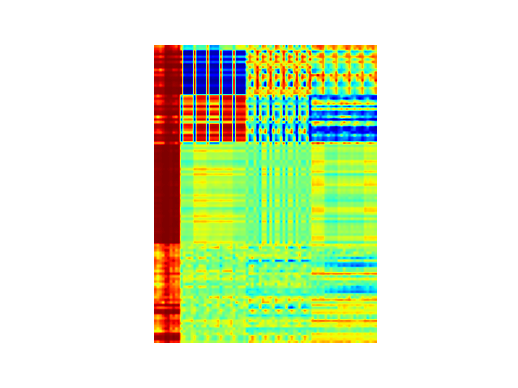

In [27]:
plt.figure()
plt.imshow(tot_matrix.T, cmap='jet')
plt.axis('off')
plt.show()

In [28]:
# plt.savefig('/home/katerina/catkin_ws/src/vision_based_fall_detection/heatmaps/'
#             +subjects[subject_id][:-4]+'/'+reference_action+'_coord_map.pdf')

In [29]:
# MIN length calculation for all subjects 
def calculate_min_length(pose):
    coordinate_num = 3
    joints_num = len(pose[0][0])
    min_len = len(pose[0][0][0])
    action_num = len(pose[0])
    for j in range(joints_num):
        for i in range(coordinate_num):
            for a in range(action_num):
                next_len = pose[i][a][j]
                if (min_len<len(next_len)):
                    min_len = min_len
#                     print("Maintain min len",min_len)
                elif (min_len>len(next_len)):
                    min_len = len(next_len)
#                     print("Change min len",min_len)
    return min_len


In [30]:
min_len = calculate_min_length(pose)
print(min_len)

818


In [31]:
# subject = choose_subject(12)
# new_action = choose_action(subject[1])
# # print(new_action[4])
# new_filelist = {
#     "cutting_data": new_action[0],
#     "gait_data": new_action[1],
#     "std2sit_data": new_action[2],
#     "sit2std_data": new_action[3],
#     "turn_data": new_action[4],
#     "stat_data": new_action[5]
#         }
# ref_action = "gait_data"
# new_pose  = action_xyz_categorization(new_filelist[ref_action])
# # new_pose  = action_xyz_categorization(new_action[4])
# mlen = calculate_min_length(new_pose)
# print("NEW min len", mlen)
